In [ ]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib.image as img
import seaborn as sns
import PIL.Image as Image
import cv2
import os
import numpy as np
import pathlib
print(tf. __version__)

2.15.0


In [ ]:
data_dir = "./Rice_Image_Dataset"
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('Rice_Image_Dataset')

In [ ]:
arborio = list(data_dir.glob('Arborio/*'))[:600]
basmati = list(data_dir.glob('Basmati/*'))[:600]
ipsala = list(data_dir.glob('Ipsala/*'))[:600]
jasmine = list(data_dir.glob('Jasmine/*'))[:600]
karacadag = list(data_dir.glob('Karacadag/*'))[:600]

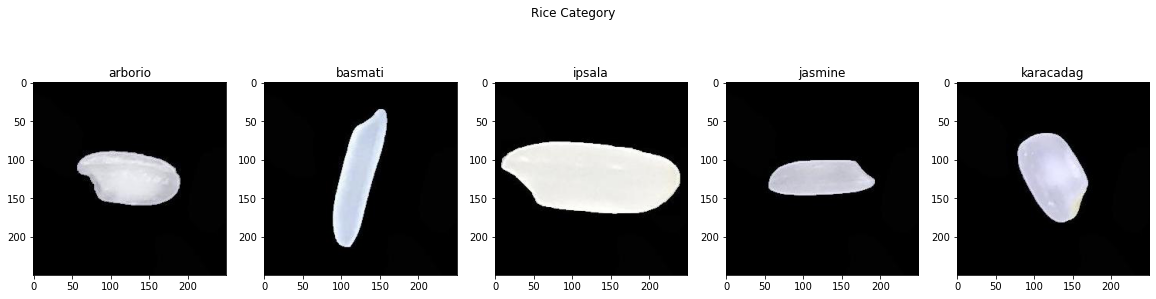

In [ ]:
fig, ax = plt.subplots(ncols=5, figsize=(20,5))
fig.suptitle('Rice Category')
arborio_image = img.imread(arborio[0])
basmati_image = img.imread(basmati[0])
ipsala_image = img.imread(ipsala[0])
jasmine_image = img.imread(jasmine[0])
karacadag_image = img.imread(karacadag[0])

ax[0].set_title('arborio')
ax[1].set_title('basmati')
ax[2].set_title('ipsala')
ax[3].set_title('jasmine')
ax[4].set_title('karacadag')

ax[0].imshow(arborio_image)
ax[1].imshow(basmati_image)
ax[2].imshow(ipsala_image)
ax[3].imshow(jasmine_image)
ax[4].imshow(karacadag_image)

plt.show()

In [ ]:
df_images = {
    'arborio' : arborio,
    'basmati' : basmati,
    'ipsala' : ipsala,
    'jasmine' : jasmine,
    'karacadag': karacadag
}

df_labels = {
    'arborio' : 0,
    'basmati' : 1,
    'ipsala' : 2,
    'jasmine' : 3,
    'karacadag': 4
}

In [ ]:
img = cv2.imread(str(df_images['arborio'][0]))
img.shape

(250, 250, 3)

In [ ]:
X, y = [], []
for label, images in df_images.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img, (224, 224))
        X.append(resized_img)
        y.append(df_labels[label])

In [ ]:
X = np.array(X)
X = X/255
y = np.array(y)

In [ ]:
#Spliting into test val train
X_train, X_test_val, y_train, y_test_val = train_test_split(X, y)
X_test, X_val, y_test, y_val = train_test_split(X_test_val, y_test_val)

In [ ]:
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [ ]:
base_model = MobileNet(weights="imagenet",
                       include_top=False,
                       input_shape=(224, 224, 3)) #imports the mobilenet model and discards the last 1000 neuron layer.

In [ ]:
base_model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32

In [ ]:
mobile = keras.applications.mobilenet.MobileNet()
def prepare_image(file):
    img_path = './Rice_Image_Dataset'
    img = image.load_img(img_path + file, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    return keras.applications.mobilenet.preprocess_input(img_array_expanded_dims)

17227776/17225924 [==============================] - 1s 0us/step


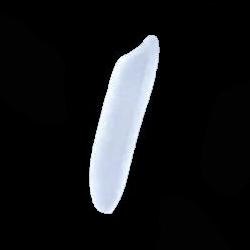

In [ ]:
from IPython.display import Image
Image(filename='./Rice_Image_Dataset/Basmati/Basmati (1).jpg')

In [ ]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import imagenet_utils
from IPython.display import Image
preprocessed_image = prepare_image('./Rice_Image_Dataset/Basmati/Basmati (1).jpg')
predictions = mobile.predict(preprocessed_image)
results = imagenet_utils.decode_predictions(predictions)
results

[[('n03658185', 'letter_opener', 0.2853107),
  ('n01924916', 'flatworm', 0.24065813),
  ('n01930112', 'nematode', 0.225997),
  ('n03793489', 'mouse', 0.04218471),
  ('n02951585', 'can_opener', 0.024154855)]]

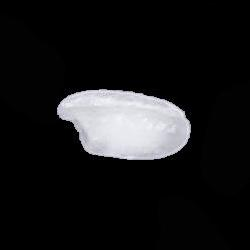

In [ ]:
from IPython.display import Image
Image(filename='./Rice_Image_Dataset/Arborio/Arborio (1).jpg')

In [ ]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import imagenet_utils
preprocessed_image = prepare_image('./Rice_Image_Dataset/Arborio/Arborio (1).jpg')
predictions = mobile.predict(preprocessed_image)
results = imagenet_utils.decode_predictions(predictions)
results

[[('n01910747', 'jellyfish', 0.2656761),
  ('n03929660', 'pick', 0.14674394),
  ('n01496331', 'electric_ray', 0.090365805),
  ('n03314780', 'face_powder', 0.036759917),
  ('n07684084', 'French_loaf', 0.033960488)]]

In [ ]:
top_model = Sequential()
top_model.add(Flatten(input_shape=base_model.output_shape[1:]))
top_model.add(Dense(32, activation="relu"))
top_model.add(Dense(10, activation="softmax"))

top_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 50176)             0         
_________________________________________________________________
dense (Dense)                (None, 32)                1605664   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                330       
Total params: 1,605,994
Trainable params: 1,605,994
Non-trainable params: 0
_________________________________________________________________


In [ ]:
transfer_model = Sequential()
transfer_model.add(base_model)
transfer_model.add(top_model)

transfer_model.layers[0].trainable = False
transfer_model.summary()

transfer_model.compile(
  optimizer="adam",
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['acc'])


history = transfer_model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenet_1.00_224 (Model)   (None, 7, 7, 1024)        3228864   
_________________________________________________________________
sequential (Sequential)      (None, 10)                1605994   
Total params: 4,834,858
Trainable params: 1,605,994
Non-trainable params: 3,228,864
_________________________________________________________________
Train on 2250 samples, validate on 188 samples
Epoch 1/10
2250/2250 [==============================] - 116s 52ms/sample - loss: 2.1443 - acc: 0.3160 - val_loss: 2.2376 - val_acc: 0.2234
Epoch 2/10
2250/2250 [==============================] - 120s 53ms/sample - loss: 2.0596 - acc: 0.4013 - val_loss: 2.0138 - val_acc: 0.4468
Epoch 3/10
2250/2250 [==============================] - 118s 53ms/sample - loss: 1.9395 - acc: 0.5213 - val_loss: 1.9409 - val_acc: 0.5160
Epoch 4/10
2250/2250 [============

In [ ]:
from sklearn.metrics import accuracy_score
y_pred = transfer_model.predict(X_test, batch_size=64, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

accuracy_score(y_test, y_pred_bool)

562/562 [==============================] - 7s 13ms/sample


0.5266903914590747

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_bool))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       124
           1       0.31      1.00      0.47       108
           2       1.00      0.79      0.89       107
           3       0.00      0.00      0.00       116
           4       0.80      0.96      0.88       107

    accuracy                           0.53       562
   macro avg       0.42      0.55      0.45       562
weighted avg       0.40      0.53      0.43       562



C:\Suneel\Anaconda\envs\modelling\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


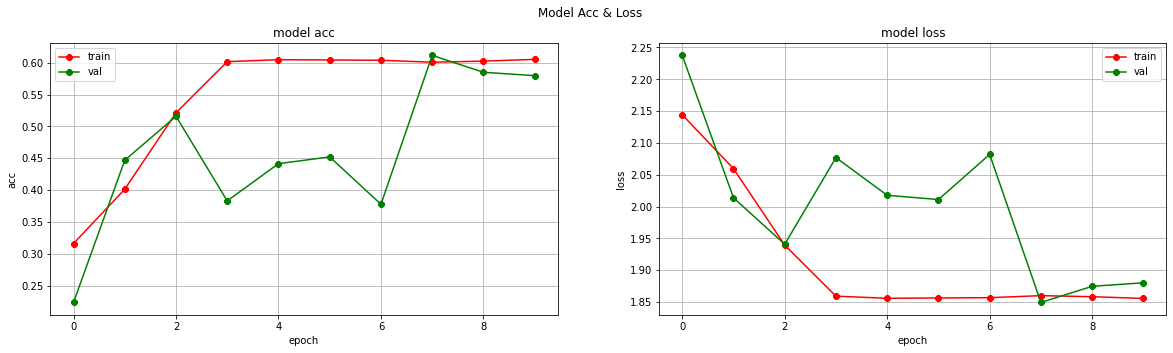

In [ ]:
fig, ax = plt.subplots(ncols=2, figsize=(20,5))
fig.suptitle('Model Acc & Loss')


ax[0].set_title('model acc')
ax[1].set_title('model loss')

ax[0].grid()
ax[0].set_xlabel('epoch')
ax[0].set_ylabel('acc')
ax[0].plot(history.history['acc'], marker='8',color='red')
ax[0].plot(history.history['val_acc'], marker='8',color='green')
ax[0].legend(['train', 'val'])

ax[1].grid()
ax[1].set_xlabel('epoch')
ax[1].set_ylabel('loss')
ax[1].plot(history.history['loss'], marker='8',color='red')
ax[1].plot(history.history['val_loss'], marker='8',color='green')
ax[1].legend(['train', 'val'])

plt.show()

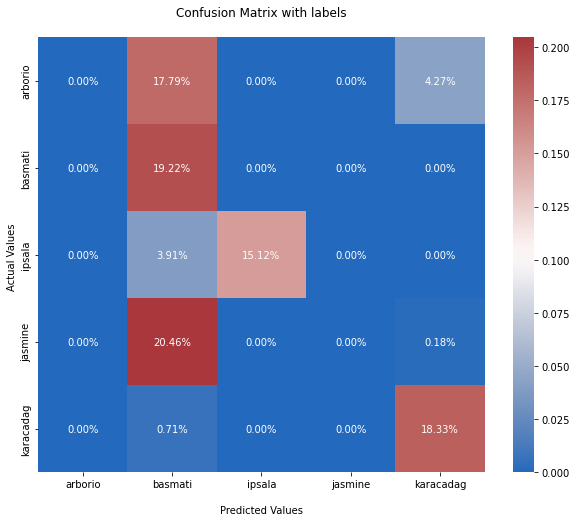

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_bool)

plt.figure(figsize=(10,8))

ax = sns.heatmap(cm/np.sum(cm),fmt='.2%', annot=True, cmap='vlag')

ax.set_title('Confusion Matrix with labels\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(df_labels)
ax.yaxis.set_ticklabels(df_labels)

plt.show()

(1, 10)
2


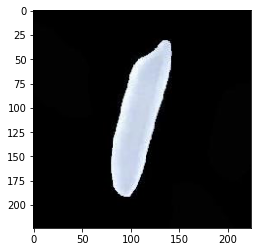

In [ ]:
img_path = './Rice_Image_Dataset/Basmati/Basmati (1).jpg'

img=np.array(img)/255.0
img = image.load_img(img_path, target_size=(224, 224))
img = image.img_to_array(img, dtype=np.uint8)
plt.imshow(img.squeeze())
p=transfer_model.predict(img[np.newaxis, ...])
print(p.shape)
predicted_class = np.argmax(p[0], axis=-1)
print(predicted_class)